In [3]:
import mahotas as mh
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
import os

%matplotlib inline

In [4]:
def measureNuclearSize(file):

    max_size = 5000
    min_size = 100
    image = io.imread(file)

    # Gaussian filteringn and thresholding to make binary image
    imagef = mh.gaussian_filter(image, 4)
    imagef = (image > image.mean())

    #Labeling all the nuclei in the image
    labeled, numberOfNuclei = mh.label(imagef)

    #Remove congregated nuclei and micronuclei
    sizes = mh.labeled.labeled_size(labeled)
    too_big = np.where(sizes > 10000)
    labeled = mh.labeled.remove_regions(labeled, too_big)
    too_small = np.where(sizes < 1000)
    labeled = mh.labeled.remove_regions(labeled, too_small)

    # Remove cells at the borders
    labeled = mh.labeled.remove_bordering(labeled)

    # Relabel everthing
    relabeled, n_final = mh.labeled.relabel(labeled)

    # Labeling the nuclei whose size is between min and max size and not at the borders
    # relabeled, numberOfNuclei = mh.labeled.filter_labeled(labeled, remove_bordering = True, max_size = max_size, min_size = min_size)

    # Nuclear size
    sizes = mh.labeled.labeled_size(relabeled)

    return sizes[1:]

# Goal:

### Set up a pipeline by which I can automate the nuclear size measurement to plotting.

In [5]:
%ls

40X Olympus.geo*                        Transmitted.dye*
96 Well BD Falcon Imaging [353219].plt* Transmitted.ltp*
CY5.drt*                                Well B02/
CY5.dye*                                Well B03/
CY5.ltp*                                Well B04/
DRAQ5trans (96 Well) (96 Well).mac*     Well C02/
Experiment.exp*                         Well C03/
FocusMap.txt*                           Well C04/
InstructionDurations.txt*               Well D02/
Lamp B Reference.ffc*                   Well D03/
Laser AutoFocus.afc*                    Well D04/
Montage 6 x 6.mon*                      batch_nuclear_size_analysis.ipynb
RoiSummary.txt*                         nuclear_size.pickle
Transmitted Reference.ffc*              nuclear_size_analysis.csv
Transmitted.drt*                        nuclear_size_analysis.pickle


In [6]:
current_path = %pwd

In [7]:
file_list = os.listdir('/Users/csyk2/Desktop/20130624 HeLa')
folder_list = [os.path.join(current_path, i) for i in file_list if i[:4] == 'Well']

In [8]:
result_dictionary = {}

# Measurement

In [9]:
%%time

for folder in folder_list:
    file_list = [os.path.join(folder, i) for i in os.listdir(folder) if i[:3] == 'CY5' and i[-3:] == 'tif']
    temp_list = []
    for file in file_list:
        temp_list += measureNuclearSize(file).tolist()
    result_dictionary[folder] = temp_list

CPU times: user 1min 18s, sys: 5.57 s, total: 1min 24s
Wall time: 1min 29s


# Save the measurement file as csv

In [10]:
import csv

with open('nuclear_size_analysis.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.writer(f)
    w.writerows(result_dictionary.items())

In [11]:
import pickle

with open('nuclear_size_analysis.pickle', 'wb') as handle:
    pickle.dump(result_dictionary, handle)

In [12]:
with open('nuclear_size_analysis.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [13]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
result_list = [i for i in result_dictionary.values()]
well_list = [i[-3:] for i in result_dictionary.keys()]

# Display the table

In [15]:
temp_dic = dict(zip(well_list, result_list))
nuclear_size_analysis = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in temp_dic.items()]))

In [16]:
nuclear_size_analysis


,B02,B03,B04,C02,C03,C04,D02,D03,D04
0,1162.0,8735.0,2985.0,3067.0,3928,2824.0,4454.0,7233.0,4017.0
1,2062.0,6290.0,2260.0,7749.0,5641,2948.0,2952.0,1405.0,5224.0
2,4275.0,4831.0,6743.0,3154.0,1677,2118.0,3633.0,3132.0,4426.0
3,9325.0,1684.0,5677.0,2097.0,1587,2854.0,4524.0,1968.0,4641.0
4,3708.0,8398.0,2740.0,6970.0,2186,3080.0,6262.0,1799.0,5326.0
5,1720.0,2792.0,7172.0,9589.0,2121,6651.0,3321.0,7988.0,3261.0
6,2196.0,8836.0,4632.0,3181.0,2010,7215.0,7559.0,1279.0,2651.0
7,2044.0,1894.0,8864.0,2214.0,1275,6169.0,4174.0,2417.0,5315.0
8,2592.0,1708.0,5354.0,3179.0,5728,8124.0,8553.0,2240.0,4142.0
9,1550.0,4129.0,3457.0,6910.0,1638,6405.0,4117.0,2018.0,3356.0


In [17]:
nuclear_size_analysis.describe(include = [np.float])

/Users/csyk2/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,B02,B03,B04,C02,C04,D02,D03,D04
count,760.000000,346.000000,189.000000,283.000000,424.000000,261.000000,615.000000,383.000000
mean,3293.128947,3478.407514,5062.603175,4536.734982,4671.599057,4803.191571,3651.782114,4579.216710
std,1940.960291,2004.955469,2189.441852,2037.784962,2183.547215,1944.445270,2052.547449,2114.406415
min,1000.000000,1043.000000,1177.000000,1134.000000,1003.000000,1021.000000,1198.000000,1096.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,9883.000000,9848.000000,9958.000000,9834.000000,9833.000000,9841.000000,9957.000000,9989.000000


![img](http://www.cellsignet.com/media/plates/96.jpg)

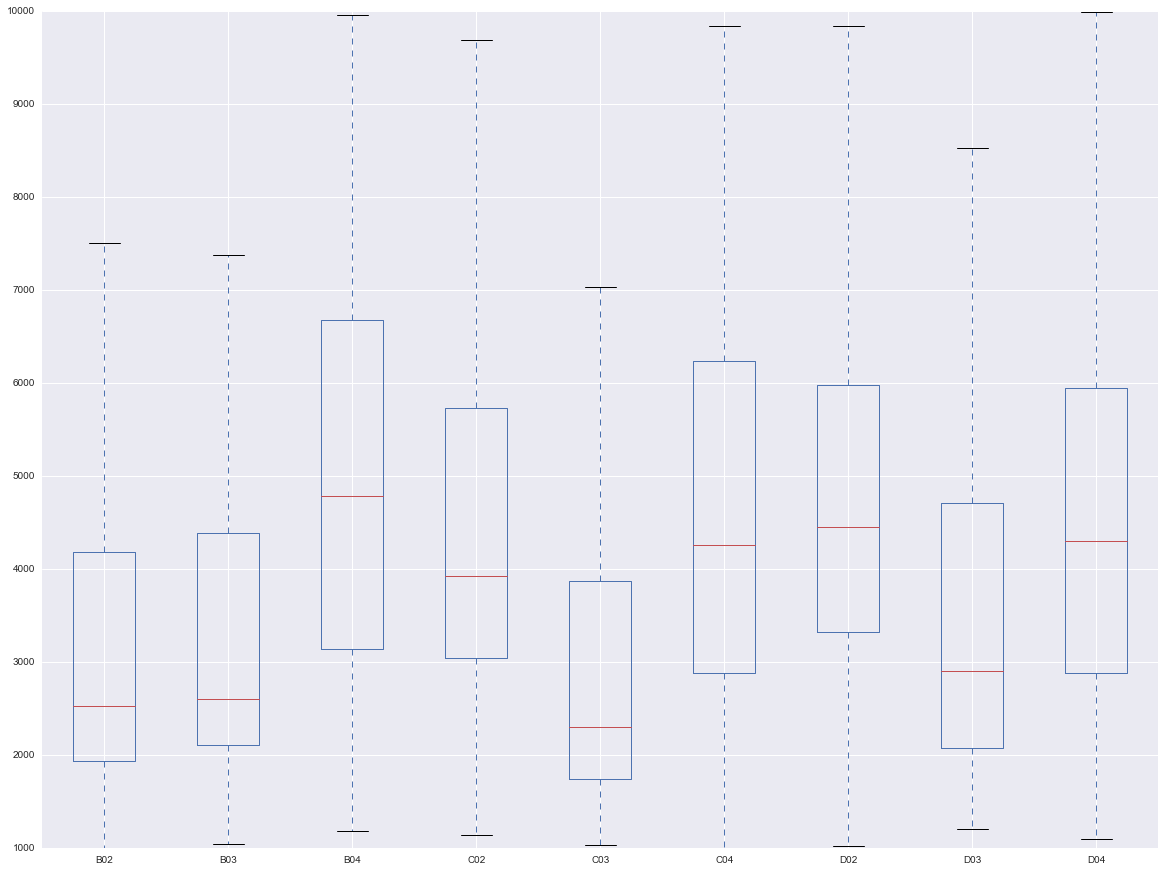

In [18]:
nuclear_size_analysis.plot(kind = 'box', figsize = (20, 15))

#C02 and D02 were out of focus

In [19]:
untreated = [i for i in well_list if i[-2:] == '02' and i[0] == 'B']
DMSO = [i for i in well_list if i[-2:] == '03']
RO = [i for i in well_list if i[-2:] == '04']

untreated_result = np.ravel(nuclear_size_analysis[untreated].values)
DMSO_result = np.ravel(nuclear_size_analysis[DMSO].values)
RO_result = np.ravel(nuclear_size_analysis[RO].values)

In [20]:
temp_dic2 = dict(zip(['untreated', 'DMSO', 'RO'], [untreated_result, DMSO_result, RO_result]))
final_nuclear_size_analysis = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in temp_dic2.items()]))
final_nuclear_size_analysis = final_nuclear_size_analysis[['untreated', 'DMSO', 'RO']]
final_nuclear_size_analysis.describe()

/Users/csyk2/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,untreated,DMSO,RO
count,760.000000,1741.000000,996.000000
mean,3293.128947,3348.355543,4710.271084
std,1940.960291,1983.849735,2163.309176
min,1000.000000,1031.000000,1003.000000
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,9883.000000,9957.000000,9989.000000


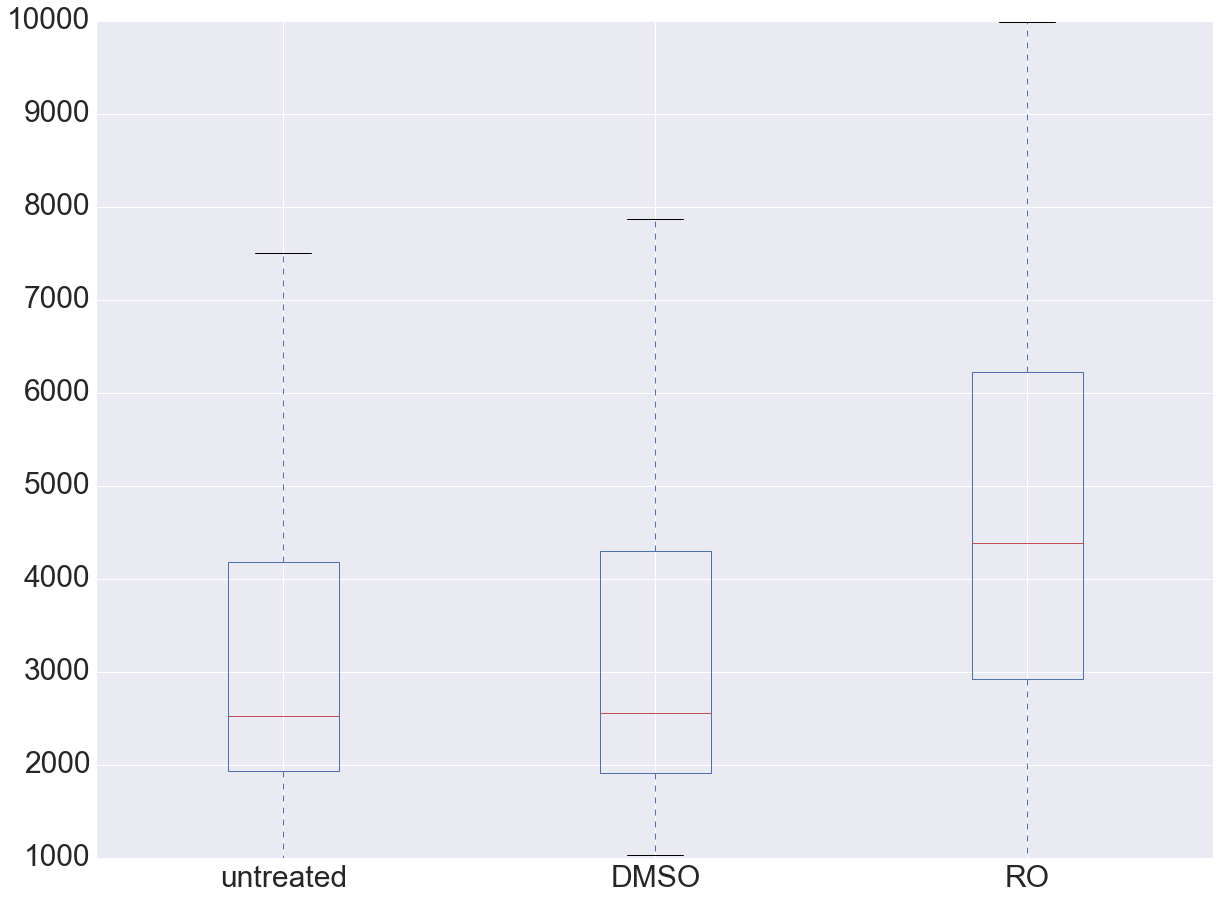

In [213]:
final_nuclear_size_analysis.plot(kind = 'box', figsize = (20, 15), fontsize = 30)

# Follow-ups:
### 1. statistics
### 2. printouts for mid steps
### 3. dot distribution
### 4. on iPhone or iPad